In [97]:
from datetime import datetime

# Define the YEAR
YEAR = 2023

# Define the TICKER
TICKER = "AAPL"

# Define the quarters
quarters = {
    "Q1": {"start": datetime(YEAR, 1, 1).date(), "end": datetime(YEAR, 3, 31).date()},
    "Q2": {"start": datetime(YEAR, 4, 1).date(), "end": datetime(YEAR, 6, 30).date()},
    "Q3": {"start": datetime(YEAR, 7, 1).date(), "end": datetime(YEAR, 9, 30).date()},
    "Q4": {"start": datetime(YEAR, 10, 1).date(), "end": datetime(YEAR, 12, 31).date()},
    "TEST": {"start": datetime(YEAR, 10, 2).date(), "end": datetime(YEAR, 10, 30).date()},
}

# Access the concrete quarter
quarter = quarters['Q3']

# Access a specific quarter
print(f"start: {quarter['start']} \nend: {quarter['end']}")

start: 2023-07-01 
end: 2023-09-30


In [98]:
print(quarter['start'].strftime("%Y%m%dT%H%M"))

20230701T0000


In [99]:
"""import finnhub

finnhub_client = finnhub.Client(api_key="cl0hvnpr01qn90kn213gcl0hvnpr01qn90kn2140")

articles = finnhub_client.company_news('IBM', _from=quarter['start'], to=quarter['end'])

# Print the number of articles
print(f'Number of articles: {len(articles)}')

# Display the articles
display(articles)"""

'import finnhub\n\nfinnhub_client = finnhub.Client(api_key="cl0hvnpr01qn90kn213gcl0hvnpr01qn90kn2140")\n\narticles = finnhub_client.company_news(\'IBM\', _from=quarter[\'start\'], to=quarter[\'end\'])\n\n# Print the number of articles\nprint(f\'Number of articles: {len(articles)}\')\n\n# Display the articles\ndisplay(articles)'

In [100]:
print(quarter['start'].strftime("%Y%m%dT%H%M"))

20230701T0000


In [101]:

import requests

#API keys:
#J2HCJM7JFX00M0TL
#0JV1305HSHHJ3MNH 


# Define constants
TICKER = 'GOOG'
API_KEY = "J2HCJM7JFX00M0TL"

# Define time range
#time_from = "time_from=20230301T0000"
#time_to = "time_to=20230301T2359"

time_from = quarter['start'].strftime("%Y%m%dT%H%M")
time_to = quarter['end'].strftime("%Y%m%dT%H%M")

# Define other parameters
limit = "limit=1000"
#sort = "sort=EARLIEST"

headers = {
    "projectName": "zhikovapp",
    "Authorization": "Bearer HZCdsf="
}

# Construct the API URL
base_url = 'https://www.alphavantage.co/query?'
function = 'function=NEWS_SENTIMENT'
ticker = f'tickers={TICKER}'
api_key = f'apikey={API_KEY}'
api = f'{base_url}{function}&{ticker}&{time_from}&{time_to}&{limit}&{api_key}'

try:
    # Send a GET request to the API
    response = requests.get(api, timeout=5)
    
    # Parse the response as JSON
    json_response = response.json()
    print(json_response)
    
    # Extract the articles from the response
    articles = json_response['feed']
    
    # Print the number of articles
    print(f'Number of articles: {len(articles)}')
    
    # Display the articles
    display("Sample of article", articles)
    
except requests.exceptions.HTTPError as errh:
    print ("Http Error:",errh)
except requests.exceptions.ConnectionError as errc:
    print ("Error Connecting:",errc)
except requests.exceptions.Timeout as errt:
    print ("Timeout Error:",errt)
except requests.exceptions.RequestException as e: 
    raise SystemExit(e)



{'items': '726', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': [{'title': 'IPO Stock Of The Week: Advertising Leader Offers New Buy Point', 'url': 'https://www.investors.com/stock-lists/ipo-analysis/ipo-stock-of-the-week-advertising-leader-doubleverify-offers-new-buy-point-after-43-rally/', 'time_published': '20231222T180100', 'authors': ["Investor's Business Daily", 'SCOTT LEHTONEN'], 'summary': "IPO Stock Of The Week DoubleVerify ( DV ) offers a fresh buy point, as the stock market holds near its 2023 highs. The digital advertising leader is on IBD's IPO Leaders screen. New York City-based DoubleVerify provides digital media measurement and data analytics for internet TV and social ...", 'banner_image': 'https://www.investors.com/wp-content/uploads/2023/12/S

'Sample of article'

[{'title': 'IPO Stock Of The Week: Advertising Leader Offers New Buy Point',
  'url': 'https://www.investors.com/stock-lists/ipo-analysis/ipo-stock-of-the-week-advertising-leader-doubleverify-offers-new-buy-point-after-43-rally/',
  'time_published': '20231222T180100',
  'authors': ["Investor's Business Daily", 'SCOTT LEHTONEN'],
  'summary': "IPO Stock Of The Week DoubleVerify ( DV ) offers a fresh buy point, as the stock market holds near its 2023 highs. The digital advertising leader is on IBD's IPO Leaders screen. New York City-based DoubleVerify provides digital media measurement and data analytics for internet TV and social ...",
  'banner_image': 'https://www.investors.com/wp-content/uploads/2023/12/Stock-doubleverify-01-shutt.jpg',
  'source': 'Investors Business Daily',
  'category_within_source': 'n/a',
  'source_domain': 'www.investors.com',
  'topics': [{'topic': 'IPO', 'relevance_score': '0.769861'},
   {'topic': 'Financial Markets', 'relevance_score': '0.999956'},
   {'to

In [102]:
# get list of unique publishers
publishers = list(set([article['source'] for article in articles]))
display("List of sources", publishers)

'List of sources'

['CNBC',
 'Canada Newswire',
 'The Atlantic',
 'Wall Street Journal',
 'The Financial Express',
 'Financial Times',
 'UPI Business',
 'Kiplinger',
 'Zacks Commentary',
 'Money Control',
 'Fox Business News',
 'Investing News Network',
 'Barrons',
 'PR Newswire',
 'Business Insider',
 'South China Morning Post',
 'GlobeNewswire',
 'Investors Business Daily',
 'Forbes',
 'Al Jareeza',
 'The Week News',
 'Investor Ideas',
 'PennyStocks.com',
 'Benzinga',
 'The Economist',
 'CNN',
 'Decrypt.co',
 'Associated Press',
 'Motley Fool',
 'Cointelegraph',
 'Business Standard',
 'MarketWatch']

In [113]:
# Import the yfinance library, which provides a Python client for the Yahoo Finance API
import yfinance as yf

# Import the datetime module, which provides functions to manipulate dates and times
from datetime import datetime

# Extract the start and end times from the input params time_from and time_to strings
#start_time_str = time_from.split('=')[1]
#end_time_str = time_to.split('=')[1]

# Convert the start and end times to datetime objects
#start_time = datetime.strptime(start_time_str, '%Y%m%dT%H%M')
#end_time = datetime.strptime(end_time_str, '%Y%m%dT%H%M')

# Format the start and end times as strings in the format 'YYYY-MM-DD'
#start_date = start_time.strftime('%Y-%m-%d')
#end_date = end_time.strftime('%Y-%m-%d')

# Use the yfinance client to download the stock data for AAPL
quotes = yf.download(TICKER, rounding=True, start=quarter['start'], end=quarter['end'])

# Display the downloaded stock data
display(quotes)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,120.32,121.02,119.71,120.56,120.56,13888300
2023-07-05,120.06,123.37,120.06,122.63,122.63,17830300
2023-07-06,120.64,121.15,119.25,120.93,120.93,17732500
2023-07-07,120.89,121.75,120.09,120.14,120.14,20982400
2023-07-10,119.07,119.07,116.64,116.87,116.87,32960100
...,...,...,...,...,...,...
2023-09-25,130.77,132.22,130.03,132.17,132.17,14650000
2023-09-26,130.91,131.40,128.19,129.45,129.45,20378800
2023-09-27,129.44,131.72,129.38,131.46,131.46,18764200


In [131]:
import pandas as pd
from datetime import datetime

# Define a function to get the news volume for each day
def get_news_volume(articles, quotes) -> dict:
    # Initialize an empty dictionary to store the news volume
    news_volume = {}

    # Iterate over each article
    for article in articles:
        # Convert the article's datetime to a pandas Timestamp object
        temp_date = datetime.strptime(article['time_published'],"%Y%m%dT%H%M%S")
        print("Before: ", temp_date)

        # Remove the time part
        temp_date = temp_date.date()
        print("After: ", temp_date)

        date = pd.Timestamp(temp_date)
        print(date)

        # If the date already exists in the dictionary, increment its count
        # Otherwise, add the date to the dictionary with a count of 1
        if date in news_volume:
            news_volume[date] += 1
        else:
            news_volume[date] = 1

    # Ensure that a bin exists for each day we have price data
    # If a date does not exist in the dictionary, add it with a count of 0
    for date in quotes.index:
        news_volume[date] = news_volume[date] if date in news_volume else 0

    # Sort the dictionary by date
    news_volume = dict(sorted(news_volume.items()))

    # Print the total sum of news volume
    print(sum(news_volume.values()))
    
    # Return the dictionary of news volume
    return news_volume

In [132]:
news_volume = get_news_volume(articles, quotes)
for date, volume in news_volume.items():
    print(f"{date} | {volume} | {date.strftime('%A')}")  

Before:  2023-12-22 18:01:00
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 17:17:19
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 17:14:26
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 16:55:22
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 16:46:35
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 16:36:34
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 16:25:00
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 16:25:00
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 15:59:00
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 15:48:00
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 15:47:18
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 15:27:41
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 15:25:57
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 15:25:00
After:  2023-12-22
2023-12-22 00:00:00
Before:  2023-12-22 15:12:14
After:  2023-12-22


In [133]:
quotes['News Volume'] = 0

temp_volume = 0

for date, volume in news_volume.items():
    if date in quotes.index:
        # Add the volume of the current day and the volume of the previous days not in quotes
        quotes.loc[date, 'News Volume'] = volume + temp_volume
        temp_volume = 0
    else:
        # Accumulate the volume of the days not in quotes
        temp_volume += volume

display(quotes)

,Open,High,Low,Close,Adj Close,Volume,News Volume
Date,,,,,,,
2023-07-03,120.32,121.02,119.71,120.56,120.56,13888300,0
2023-07-05,120.06,123.37,120.06,122.63,122.63,17830300,0
2023-07-06,120.64,121.15,119.25,120.93,120.93,17732500,0
2023-07-07,120.89,121.75,120.09,120.14,120.14,20982400,0
2023-07-10,119.07,119.07,116.64,116.87,116.87,32960100,0
...,...,...,...,...,...,...,...
2023-09-25,130.77,132.22,130.03,132.17,132.17,14650000,0
2023-09-26,130.91,131.40,128.19,129.45,129.45,20378800,0
2023-09-27,129.44,131.72,129.38,131.46,131.46,18764200,0


In [118]:
import matplotlib.pyplot as plt

# Set ggplot styles and update Matplotlib with them.
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': 'white',
    'grid.linewidth': '1.2',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}

plt.rcParams.update(ggplot_styles)

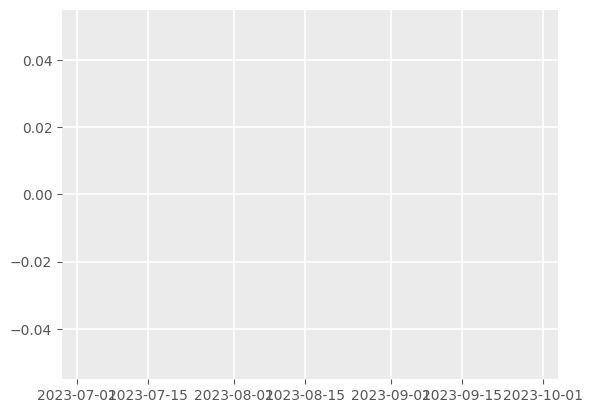

In [119]:
import matplotlib.pyplot as plt

plt.bar(quotes.index, quotes['News Volume'], width=1)
plt.show()

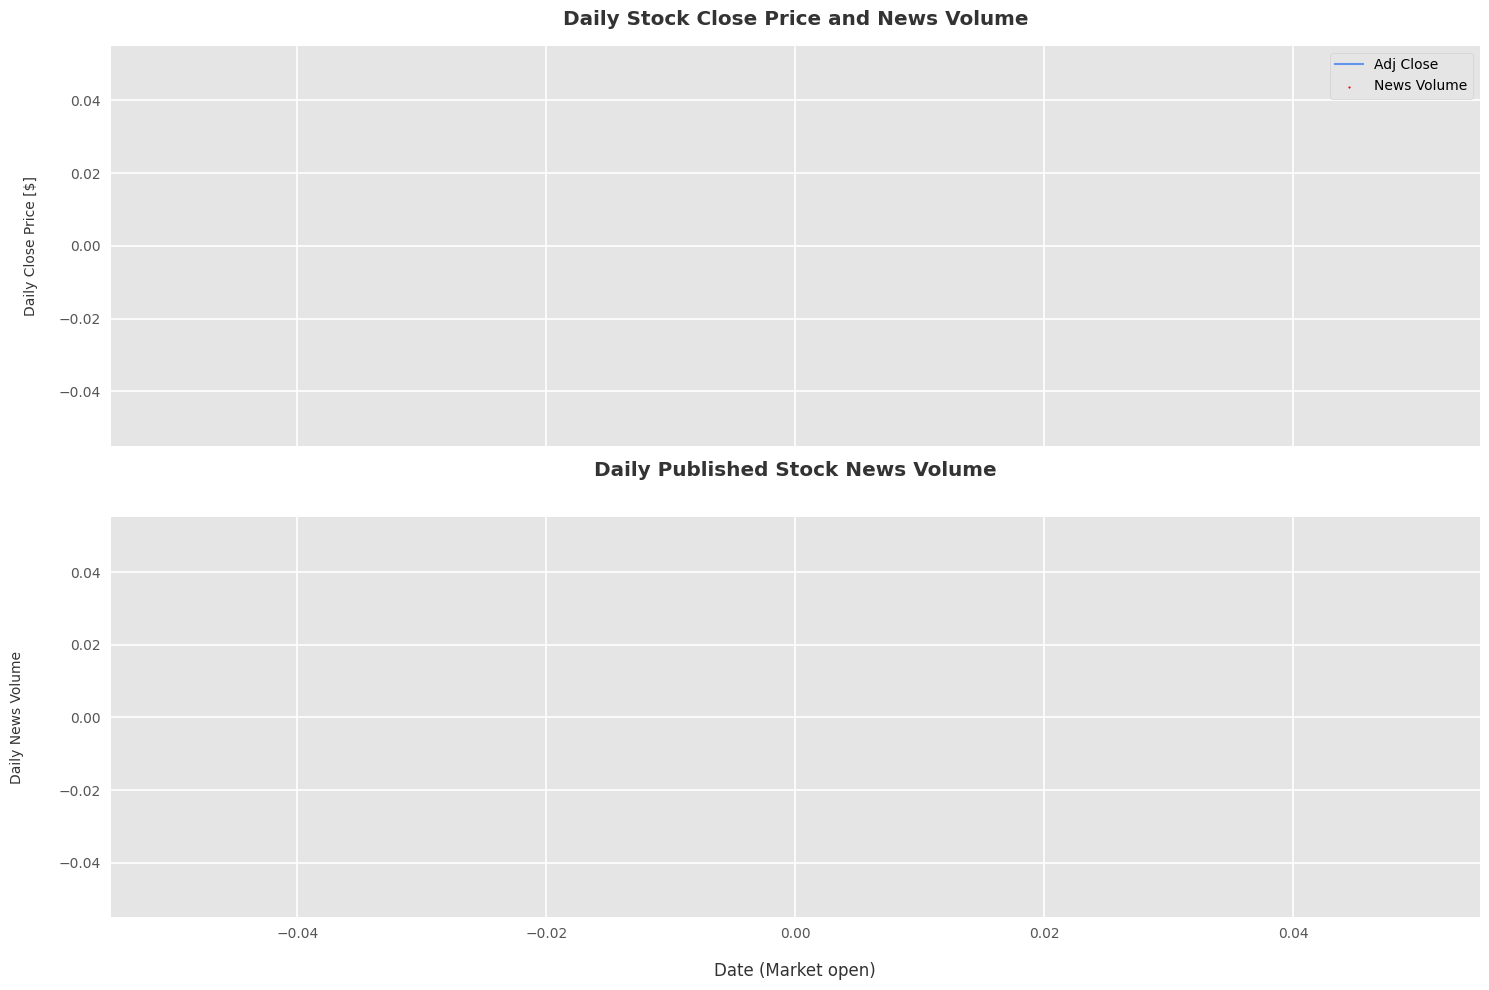

In [109]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 10))

# Plot the adjusted close prices
ax1.set_title('Daily Stock Close Price and News Volume', pad=15, color='#333333',
             weight='bold')
ax1.set_ylabel(r'Daily Close Price [\$]', labelpad=15, color='#333333', fontsize='medium')
ax1.plot(quotes.index.to_numpy(), quotes['Adj Close'].to_numpy(), label='Adj Close', color='cornflowerblue')
ax1.grid(True)
ax1.tick_params(bottom=False, left=False)

# Normalize the news volume for marker size
max_news_volume = quotes['News Volume'].max()
normalized_news_volume = (quotes['News Volume'] / max_news_volume) * 25

# Plot the news volume as red dots on the price chart
ax1.scatter(quotes.index, quotes['Adj Close'], label='News Volume', color='red', s=normalized_news_volume, zorder=2)

# Plot the news volume as a bar chart
ax2.set_title('Daily Published Stock News Volume', pad=30, color='#333333',
             weight='bold')
ax2.set_xlabel('Date (Market open)', labelpad=15, color='#333333')
ax2.set_ylabel('Daily News Volume', labelpad=25, color='#333333', fontsize='medium')
ax2.bar(quotes.index, quotes['News Volume'], width=0.6, color='red', zorder=1)
ax2.grid(True)
ax2.tick_params(bottom=False, left=False)

# Display the legend
ax1.legend()

# Adjust layout for better spacing
fig.tight_layout()

plt.show()